<a href="https://colab.research.google.com/github/KohsukeIde/numerical-calc/blob/main/%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E6%B3%95_%E8%AA%B2%E9%A1%8C13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Field(1)の勾配: [-1.17483918e-17 -4.69935672e-17]
Field(2)の勾配: [-0.4005291  -0.52804233]


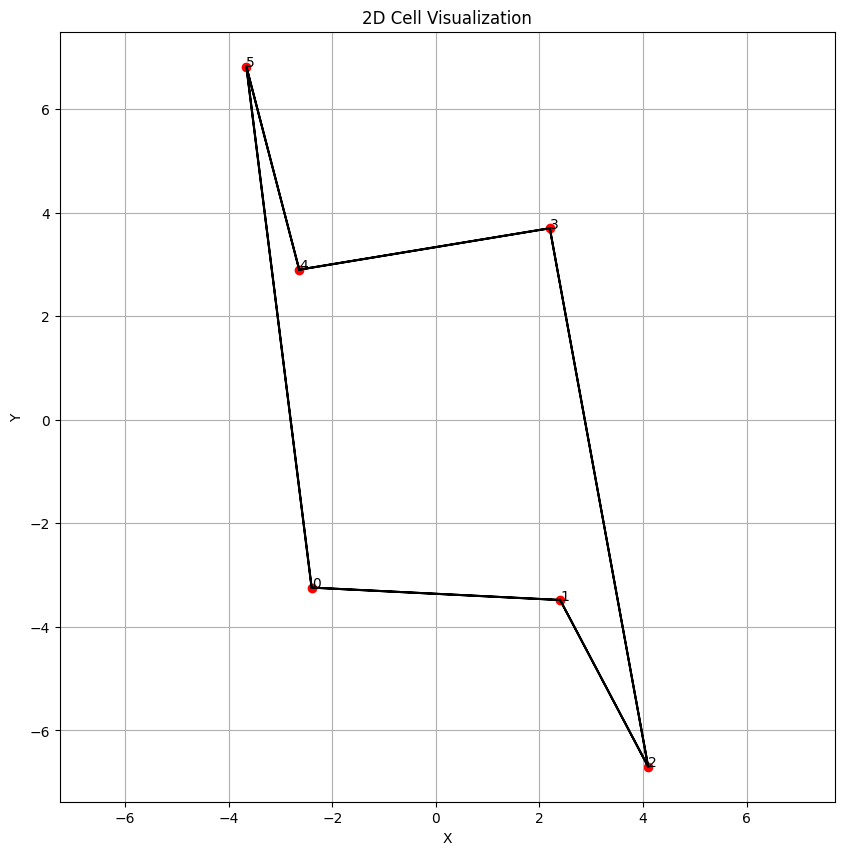

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_gradient(cell_data, field_name):
    gradient = np.zeros(2)
    volume = cell_data['volume']

    for i, face in enumerate(cell_data['faces']):
        Sf = cell_data['Sf'][i]
        field_value = cell_data[field_name][i]
        gradient += field_value * Sf

    gradient /= volume
    return gradient

# セルデータの設定
cell_data = {
    'vertices': np.array([
        [-2.4, -3.24], [2.4, -3.48], [4.1, -6.7],
        [2.2, 3.7], [-2.64, 2.9], [-3.66, 6.82]
    ]),
    'faces': [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 0]],
    'Sf': [
        np.array([-2.4, -3.24]),
        np.array([2.4, -3.48]),
        np.array([4.1, -6.7]),
        np.array([2.2, 3.7]),
        np.array([-2.64, 2.9]),
        np.array([-3.66, 6.82])
    ],
    'volume': 37.8,
    'Field(1)': [1, 1, 1, 1, 1, 1],
    'Field(2)': [10, 9, 5, 3, 4, 8]
}

# 勾配の計算
gradient_field1 = calculate_gradient(cell_data, 'Field(1)')
gradient_field2 = calculate_gradient(cell_data, 'Field(2)')

print(f"Field(1)の勾配: {gradient_field1}")
print(f"Field(2)の勾配: {gradient_field2}")

# セルの可視化
plt.figure(figsize=(10, 10))
vertices = np.array(cell_data['vertices'])
for face in cell_data['faces']:
    plt.plot(vertices[face + [face[0]], 0], vertices[face + [face[0]], 1], 'k-')
plt.scatter(vertices[:, 0], vertices[:, 1], c='r')
for i, txt in enumerate(range(len(vertices))):
    plt.annotate(txt, (vertices[i, 0], vertices[i, 1]))
plt.axis('equal')
plt.title('2D Cell Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()